# Classification Challenge

## README

The purpose of this notebook, is to compare and explore different models to predict classified data.
In this code, there are 5 main methods covered
1. KNN
    - Different k-values
2. LogReg
    - Uniform weights
    - Balanced weights
3. Decision Tree
    - Different depths
4. SVM
    - Different c-values
    - Various kernel types
5. Naive Bayes


All models are applied on [this dataset](https://www.kaggle.com/uciml/mushroom-classification).

The data is preprocessed using LabelEncoder and StandardScaler, and split randomly into a 3/4 training set, and a 1/4 testing set to asses the accuraccy of each model.
All accuracies are computed via metrics.accuracy_score()

## Imports

In [1]:
from __future__ import print_function, division
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## DataFrame

In [2]:
df = pd.read_csv('Data/mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## 0. Preprocessing

In [3]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

def split_data(df, y_col, X_col, size=0.25, rand=42):
    # split dataset in features and target variable
    X = df[X_col]  # Features
    y = df[y_col]  # Target variable
    return train_test_split(X, y, test_size=size, random_state=rand)

le = preprocessing.LabelEncoder()
les = {col: preprocessing.LabelEncoder() for col in df.columns}

for col in les:
    df[col] = les[col].fit_transform(df[col])

feature_cols = [
    'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
    'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
    'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
    'stalk-surface-below-ring', 'stalk-color-above-ring',
    'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
    'ring-type', 'spore-print-color', 'population', 'habitat'
]

X_train, X_test, y_train, y_test = split_data(df, 'class', feature_cols)

scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## 1. KNN

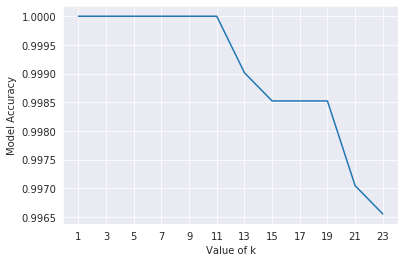

In [18]:
# Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier


def knn_finder(X_train, y_train, X_test, y_test, k):
    # Create KNN Classifier
    knn = KNeighborsClassifier(n_neighbors=k)

    # Train the model using the training sets
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    # Model Accuracy, how often is the classifier correct?
    knn_test_score = accuracy_score(y_test, y_pred)
    # print("KNeighbors Accuracy:\n", knn_test_score)
    return knn_test_score


k_range = range(1, 25, 2)
k_scores = []
for i in k_range:
    acc = knn_finder(X_train, y_train, X_test, y_test, i)
    k_scores.append(acc)

sns.set_style('darkgrid')
ax = sns.lineplot(x=k_range, y=k_scores)
ax.set_xticks(k_range)
ax.set_xlabel("Value of k")
ax.set_ylabel("Model Accuracy")
plt.show()

## 2. LogReg

In [27]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

# calc test_score
logreg_test_score = accuracy_score(y_test, y_pred)
print("LogisticRegression Accuracy:\n", logreg_test_score)

# instantiate the model (using the balanced parameter)
bal_logreg = LogisticRegression(class_weight='balanced')

# fit the model with data
bal_logreg.fit(X_train, y_train)
bal_y_pred = bal_logreg.predict(X_test)

# calc test_score
bal_logreg_test_score = accuracy_score(y_test, bal_y_pred)
print("Balanced LogisticRegression Accuracy:\n", bal_logreg_test_score)

LogisticRegression Accuracy:
 0.9551944854751354
Balanced LogisticRegression Accuracy:
 0.9581486952240276


## 3. Decision Tree

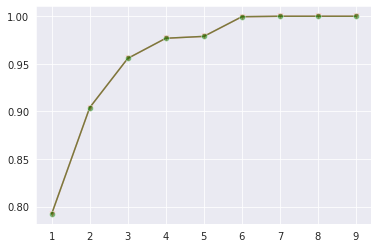

In [33]:
from sklearn.tree import DecisionTreeClassifier


def depth_finder(X_train,
                 y_train,
                 X_test,
                 y_test,
                 depth=None,
                 balanced=False,
                 rand=42):
    if balanced:
        d_tree = DecisionTreeClassifier(random_state=rand,
                                        max_depth=depth,
                                        class_weight='balanced')
    else:
        d_tree = DecisionTreeClassifier(random_state=rand, max_depth=depth)
    d_tree.fit(X_train, y_train)
    y_pred = d_tree.predict(X_test)
    tree_score = accuracy_score(y_test, y_pred)
    return tree_score


idx = []
uniform = []
balanced = []
depth_range = range(1, 10)
for i in depth_range:
    uniform.append(depth_finder(X_train, y_train, X_test, y_test, depth=i))
    balanced.append(
        depth_finder(X_train, y_train, X_test, y_test, depth=i, balanced=True))

fig, ax = plt.subplots()
sns.lineplot(ax=ax,
             x=depth_range,
             y=uniform,
             color='red',
             marker='v',
             alpha=0.5)
sns.lineplot(ax=ax,
             x=depth_range,
             y=balanced,
             color='green',
             marker='o',
             alpha=0.5)
plt.show()

## 4. SVM

In [44]:
#Import svm model
from sklearn import svm

kernel_types = ['linear', 'poly', 'rbf', 'sigmoid']
c_range = [i/10 for i in range(1,21,2)]

acc_series = []
kernel_series = []
c_series = []

for k in kernel_types:
    for c in c_range:
        clf = svm.SVC(C=c, kernel=k)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        acc_series.append(accuracy_score(y_test, y_pred))
        kernel_series.append(k)
        c_series.append(c)

svm_df = pd.DataFrame({'accuracy': acc_series, 'C': c_series, 'kernel': kernel_series})

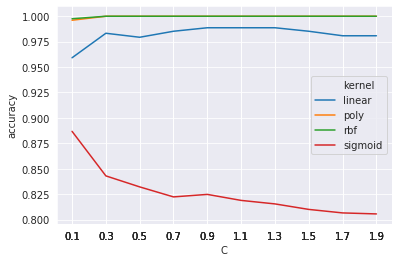

In [47]:
ax = sns.lineplot(data=svm_df, x='C', y='accuracy', hue='kernel')
ax.set_xticks(c_series)
plt.show()

## 5. Naive Bayes

In [48]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.9266371245691778
